<a href="https://www.kaggle.com/code/vt10ngoc/240118-textpreprocessingwithnltk?scriptVersionId=199585047" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Load Data**

In [1]:
import pandas as pd

# Đường dẫn tới file JSON
file_path = '/kaggle/input/vietnamese-online-news-dataset/news_dataset.json'

# Đọc file JSON thành DataFrame
df = pd.read_json(file_path)

# Hiển thị dữ liệu
print(df)


            id             author  \
0       218270                      
1       218269      (Nguồn: Sina)   
2       218268          Hồ Sỹ Anh   
3       218267           Ngọc Ánh   
4       218266  HẢI YẾN - MINH LÝ   
...        ...                ...   
184534       5         Quốc Thắng   
184535       4            Thảo Mi   
184536       3          Thanh Tâm   
184537       2           Lâm Thỏa   
184538       1          Lang Minh   

                                                  content  picture_count  \
0       Chiều 31/7, Công an tỉnh Thừa Thiên - Huế đã c...              3   
1       Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...              1   
2       Kết quả thi tốt nghiệp THPT năm 2022 cho thấy ...              3   
3       Thống đốc Kentucky Andy Beshear hôm 31/7 cho h...              1   
4       Vụ tai nạn giao thông liên hoàn trên phố đi bộ...             12   
...                                                   ...            ...   
184534  Chiều 7/6, Khoa

# **Lower Key**

In [2]:
df['content'] = df['content'].str.lower() 
print(df['content'].head())

0    chiều 31/7, công an tỉnh thừa thiên - huế đã c...
1    gần đây, thứ trưởng bộ phát triển kỹ thuật số,...
2    kết quả thi tốt nghiệp thpt năm 2022 cho thấy ...
3    thống đốc kentucky andy beshear hôm 31/7 cho h...
4    vụ tai nạn giao thông liên hoàn trên phố đi bộ...
Name: content, dtype: object


In [3]:
df['content'][0]

"chiều 31/7, công an tỉnh thừa thiên - huế đã có thông tin ban đầu về vụ nổ súng,cướp tiệm vàng tại chợ đông ba nằm trên đường trần hưng đạo (tp huế, tỉnh thừa thiên - huế). thông sài gòn giải phóng, khoảng 12h30' ngày 31/7, một đối tượng sử dụng súng ak bất ngờ xông vào tiệm vàng hoàng đức và thái lợi (phía trước chợ đông ba) rồi nổ súng chỉ thiên liên tiếp uy hiếp chủ tiệm để cướp vàng. sau đó, đối tượng mang số vàng vừa cướp được vứt ra vỉa hè rồi đi bộ đến khu vực cầu gia hội, cách khu vực gây án khoảng 300m. giám đốc công an tỉnh thừa thiên – huế lập tức trực tiếp chỉ đạo các lực lượng chức năng gồm công an tỉnh và công an tp huế nhanh chóng có mặt tại hiện trường triển khai đồng bộ các biện pháp nghiệp vụ, khoanh vùng và ngăn không để người dân đi vào hiện trường. hàng trăm tiểu thương trong chợ đông ba và người dân gần cầu gia hội được yêu cầu di chuyển khỏi hiện trường, đóng cửa nhà đề phòng đạn lạc. tuy nhiên, thấy vàng bị ném ra đường, nhiều người đua nhau nhặt, tạo cảnh nhốn

# **Extract URLs**

In [4]:

#Looking for URLs
url_pattern = r'(http\S+|https\S+|www\S+)'
df['urls'] = df['content'].str.extractall(url_pattern).groupby(level=0).agg(lambda x: ', '.join(x))



In [5]:
#Remove URLs
df['content'] = df['content'].str.replace(url_pattern, '', regex=True)

In [6]:
df['content'][0]

"chiều 31/7, công an tỉnh thừa thiên - huế đã có thông tin ban đầu về vụ nổ súng,cướp tiệm vàng tại chợ đông ba nằm trên đường trần hưng đạo (tp huế, tỉnh thừa thiên - huế). thông sài gòn giải phóng, khoảng 12h30' ngày 31/7, một đối tượng sử dụng súng ak bất ngờ xông vào tiệm vàng hoàng đức và thái lợi (phía trước chợ đông ba) rồi nổ súng chỉ thiên liên tiếp uy hiếp chủ tiệm để cướp vàng. sau đó, đối tượng mang số vàng vừa cướp được vứt ra vỉa hè rồi đi bộ đến khu vực cầu gia hội, cách khu vực gây án khoảng 300m. giám đốc công an tỉnh thừa thiên – huế lập tức trực tiếp chỉ đạo các lực lượng chức năng gồm công an tỉnh và công an tp huế nhanh chóng có mặt tại hiện trường triển khai đồng bộ các biện pháp nghiệp vụ, khoanh vùng và ngăn không để người dân đi vào hiện trường. hàng trăm tiểu thương trong chợ đông ba và người dân gần cầu gia hội được yêu cầu di chuyển khỏi hiện trường, đóng cửa nhà đề phòng đạn lạc. tuy nhiên, thấy vàng bị ném ra đường, nhiều người đua nhau nhặt, tạo cảnh nhốn

# **Remove special characters**

In [7]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
df['content'] = df['content'].str.translate(str.maketrans('', '', string.punctuation))

In [9]:
df['content'][0]

'chiều 317 công an tỉnh thừa thiên  huế đã có thông tin ban đầu về vụ nổ súngcướp tiệm vàng tại chợ đông ba nằm trên đường trần hưng đạo tp huế tỉnh thừa thiên  huế thông sài gòn giải phóng khoảng 12h30 ngày 317 một đối tượng sử dụng súng ak bất ngờ xông vào tiệm vàng hoàng đức và thái lợi phía trước chợ đông ba rồi nổ súng chỉ thiên liên tiếp uy hiếp chủ tiệm để cướp vàng sau đó đối tượng mang số vàng vừa cướp được vứt ra vỉa hè rồi đi bộ đến khu vực cầu gia hội cách khu vực gây án khoảng 300m giám đốc công an tỉnh thừa thiên – huế lập tức trực tiếp chỉ đạo các lực lượng chức năng gồm công an tỉnh và công an tp huế nhanh chóng có mặt tại hiện trường triển khai đồng bộ các biện pháp nghiệp vụ khoanh vùng và ngăn không để người dân đi vào hiện trường hàng trăm tiểu thương trong chợ đông ba và người dân gần cầu gia hội được yêu cầu di chuyển khỏi hiện trường đóng cửa nhà đề phòng đạn lạc tuy nhiên thấy vàng bị ném ra đường nhiều người đua nhau nhặt tạo cảnh nhốn nháo trước cổng chợ do đâ

# **Word Tokenize**

In [10]:
#!pip install underthesea
#!pip install swifter
#!pip install -U ipywidgets


In [11]:
import nltk
from nltk.tokenize import word_tokenize

In [12]:
df['word_tokenized_content'] = df['content'].apply(word_tokenize)

In [13]:
df['word_tokenized_content']

0         [chiều, 317, công, an, tỉnh, thừa, thiên, huế,...
1         [gần, đây, thứ, trưởng, bộ, phát, triển, kỹ, t...
2         [kết, quả, thi, tốt, nghiệp, thpt, năm, 2022, ...
3         [thống, đốc, kentucky, andy, beshear, hôm, 317...
4         [vụ, tai, nạn, giao, thông, liên, hoàn, trên, ...
                                ...                        
184534    [chiều, 76, khoa, bị, công, an, quận, phú, nhu...
184535    [ngày, 76, phiên, xử, phúc, thẩm, ông, tất, th...
184536    [các, khu, dân, cư, của, thành, phố, severodon...
184537    [việt, nam, malaysia, 20h, thứ, tư, 86, trên, ...
184538    [tôi, phải, lập, tức, đưa, qua, nhà, cô, giáo,...
Name: word_tokenized_content, Length: 184539, dtype: object

# **Stemmed Content**

In [14]:
from nltk.stem import PorterStemmer

In [20]:
pS = PorterStemmer()
df['stemmed_content'] = df['filter_stopwords'].apply(lambda tokens: [pS.stem(token) for token in tokens])
df['processed_content'] = df['stemmed_content'].apply(lambda tokens: ' '.join(tokens))

In [21]:
df['processed_content']

0         chiều 317 công an tỉnh thừa thiên huế thông ba...
1         trưởng phát triển kỹ thuật truyền thông truyền...
2         kết thi nghiệp thpt 2022 trung bình môn toán n...
3         thống đốc kentucki andi beshear hôm 317 đợt mư...
4         vụ tai nạn giao thông liên hoàn phố đi tam bạc...
                                ...                        
184534    chiều 76 khoa công an phú nhuận phối hợp công ...
184535    76 phiên xử phúc thẩm tất thành cang 50 tề trí...
184536    khu dân cư thành phố severodonetsk hoàn toàn g...
184537    việt nam malaysia 20h tư 86 vnexpress malaysia...
184538    lập tức giáo ngữ văn bải khói bốc nghi ngút kh...
Name: processed_content, Length: 184539, dtype: object

# **Remove stopwords**

In [16]:
# Change type of data to set
Vi_stopwords = set() 
with open('/kaggle/input/stopwords/vietnamese-stopwords.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    
for line in lines:
    tmp = line.rstrip()
    tmp_no_digits = ''.join([i for i in tmp if not i.isdigit()])
    if tmp_no_digits.strip(): 
        Vi_stopwords.add(tmp_no_digits)

In [17]:
df['filter_stopwords'] = df['word_tokenized_content'].apply(lambda tokens: [token for token in tokens if token not in Vi_stopwords])

In [19]:
print(df['filter_stopwords'])

0         [chiều, 317, công, an, tỉnh, thừa, thiên, huế,...
1         [trưởng, phát, triển, kỹ, thuật, truyền, thông...
2         [kết, thi, nghiệp, thpt, 2022, trung, bình, mô...
3         [thống, đốc, kentucky, andy, beshear, hôm, 317...
4         [vụ, tai, nạn, giao, thông, liên, hoàn, phố, đ...
                                ...                        
184534    [chiều, 76, khoa, công, an, phú, nhuận, phối, ...
184535    [76, phiên, xử, phúc, thẩm, tất, thành, cang, ...
184536    [khu, dân, cư, thành, phố, severodonetsk, hoàn...
184537    [việt, nam, malaysia, 20h, tư, 86, vnexpress, ...
184538    [lập, tức, giáo, ngữ, văn, bảy, khói, bốc, ngh...
Name: filter_stopwords, Length: 184539, dtype: object


# **The Bag of Words (BOW)**

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
vectorizer_bow = CountVectorizer()
bow_matrix = vectorizer_bow.fit_transform(df['processed_content'])

# **Tf–idf term weighting**

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt


In [25]:
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(df['processed_content'])

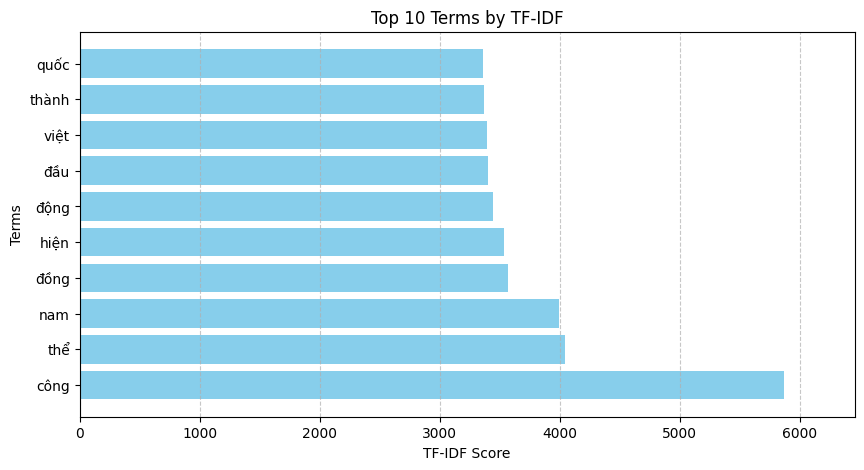

In [34]:
# TOP 10
tfidf_sum = tfidf_matrix.sum(axis=0).A1
tfidf_freq = dict(zip(vectorizer_tfidf.get_feature_names_out(), tfidf_sum))

top_n = 10
top_tfidf_terms = sorted(tfidf_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]
terms, scores = zip(*top_tfidf_terms)


plt.figure(figsize=(10, 5))
plt.barh(terms, scores, color='skyblue') 
plt.xlabel('TF-IDF Score')
plt.ylabel('Terms')
plt.title('Top 10 Terms by TF-IDF')
plt.xlim(0, max(scores) * 1.1)  
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.show()

# **Unigram**

In [35]:
vectorizer_unigram = CountVectorizer(ngram_range=(1,1))
unigram_matrix = vectorizer_unigram.fit_transform(df['processed_content'])

In [36]:
unigram_matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 26992250 stored elements and shape (184539, 182937)>

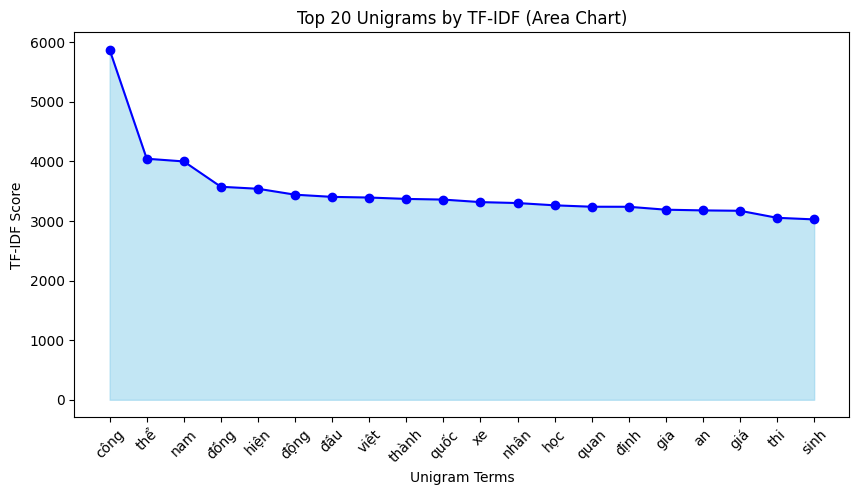

In [38]:
# Lấy top 20 unigram
top_n = 20
top_tfidf_terms = sorted(tfidf_freq.items(), key=lambda x: x[1], reverse=True)[:top_n]
terms_unigram, scores_unigram = zip(*top_tfidf_terms)

# Vẽ biểu đồ area chart
plt.figure(figsize=(10, 5))
plt.fill_between(terms_unigram, scores_unigram, color='skyblue', alpha=0.5)
plt.plot(terms_unigram, scores_unigram, marker='o', color='blue')
plt.xlabel('Unigram Terms')
plt.ylabel('TF-IDF Score')
plt.title('Top 20 Unigrams by TF-IDF (Area Chart)')
plt.xticks(rotation=45)
plt.show()



# **Biagram**

In [46]:
# Tính toán TF-IDF cho bigram
tfidf_vectorizer_bigram = TfidfVectorizer(ngram_range=(2, 2))
tfidf_matrix_bigram = tfidf_vectorizer_bigram.fit_transform(df['processed_content'])
vectorizer_bigram = CountVectorizer(ngram_range=(2,2))
bigram_matrix = vectorizer_bigram.fit_transform(df['processed_content'])

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

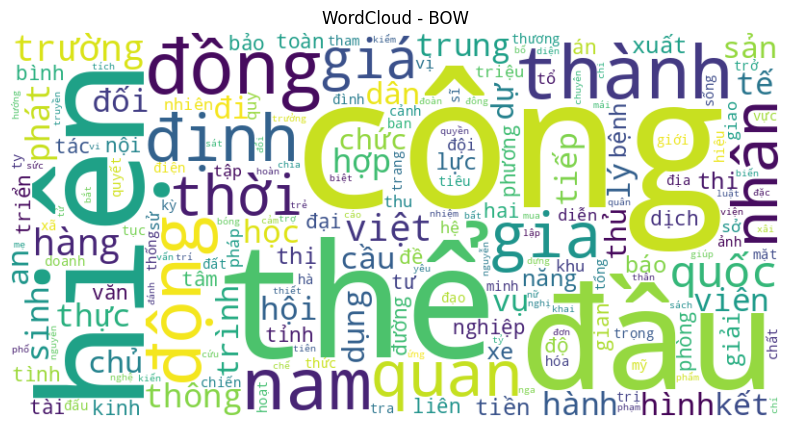

In [49]:
# Visualize the top words using WordCloud for BOW
bow_sum = bow_matrix.sum(axis=0).A1
bow_freq = dict(zip(vectorizer_bow.get_feature_names_out(), bow_sum))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bow_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - BOW')
plt.show()


In [ ]:
print(df.columns)

In [50]:
data_mining = df[['id', 'author','source',
       'title', 'topic','word_tokenized_content',
       'filter_stopwords', 'stemmed_content']].copy()
data_mining


,id,author,source,title,topic,word_tokenized_content,filter_stopwords,stemmed_content
0,218270,,docbao.vn,"Tên cướp tiệm vàng tại Huế là đại uý công an, ...",Pháp luật,"[chiều, 317, công, an, tỉnh, thừa, thiên, huế,...","[chiều, 317, công, an, tỉnh, thừa, thiên, huế,...","[chiều, 317, công, an, tỉnh, thừa, thiên, huế,..."
1,218269,(Nguồn: Sina),vtc.vn,"Bỏ qua mạng 5G, Nga tiến thẳng từ 4G lên 6G",Sống kết nối,"[gần, đây, thứ, trưởng, bộ, phát, triển, kỹ, t...","[trưởng, phát, triển, kỹ, thuật, truyền, thông...","[trưởng, phát, triển, kỹ, thuật, truyền, thông..."
2,218268,Hồ Sỹ Anh,thanhnien.vn,Địa phương nào đứng đầu cả nước tổng điểm 3 mô...,Giáo dục,"[kết, quả, thi, tốt, nghiệp, thpt, năm, 2022, ...","[kết, thi, nghiệp, thpt, 2022, trung, bình, mô...","[kết, thi, nghiệp, thpt, 2022, trung, bình, mô..."
3,218267,Ngọc Ánh,vnexpress,Người chết trong mưa lũ 'nghìn năm có một' ở M...,Thế giới,"[thống, đốc, kentucky, andy, beshear, hôm, 317...","[thống, đốc, kentucky, andy, beshear, hôm, 317...","[thống, đốc, kentucki, andi, beshear, hôm, 317..."
4,218266,HẢI YẾN - MINH LÝ,soha,"Hải Phòng: Hình ảnh xe ""điên"" gây tai nạn liên...",Thời sự - Xã hội,"[vụ, tai, nạn, giao, thông, liên, hoàn, trên, ...","[vụ, tai, nạn, giao, thông, liên, hoàn, phố, đ...","[vụ, tai, nạn, giao, thông, liên, hoàn, phố, đ..."
...,...,...,...,...,...,...,...,...
184534,5,Quốc Thắng,vnexpress,Nghi can sát hại cha bị bắt,Pháp luật,"[chiều, 76, khoa, bị, công, an, quận, phú, nhu...","[chiều, 76, khoa, công, an, phú, nhuận, phối, ...","[chiều, 76, khoa, công, an, phú, nhuận, phối, ..."
184535,4,Thảo Mi,vnexpress,Ông Tất Thành Cang được đề nghị giảm án,Pháp luật,"[ngày, 76, phiên, xử, phúc, thẩm, ông, tất, th...","[76, phiên, xử, phúc, thẩm, tất, thành, cang, ...","[76, phiên, xử, phúc, thẩm, tất, thành, cang, ..."
184536,3,Thanh Tâm,vnexpress,Nga tuyên bố 'giải phóng' hoàn toàn khu dân cư...,Thế giới,"[các, khu, dân, cư, của, thành, phố, severodon...","[khu, dân, cư, thành, phố, severodonetsk, hoàn...","[khu, dân, cư, thành, phố, severodonetsk, hoàn..."
184537,2,Lâm Thỏa,vnexpress,HLV Malaysia dọa ngáng đường Việt Nam,Thể thao,"[việt, nam, malaysia, 20h, thứ, tư, 86, trên, ...","[việt, nam, malaysia, 20h, tư, 86, vnexpress, ...","[việt, nam, malaysia, 20h, tư, 86, vnexpress, ..."


In [51]:
data_mining['topic'].value_counts()

topic
                                                                                                                                                                                                              39488
Thế giới                                                                                                                                                                                                      10722
Thể thao                                                                                                                                                                                                      10171
Xã hội                                                                                                                                                                                                         7708
Pháp luật                                                                                                                                         

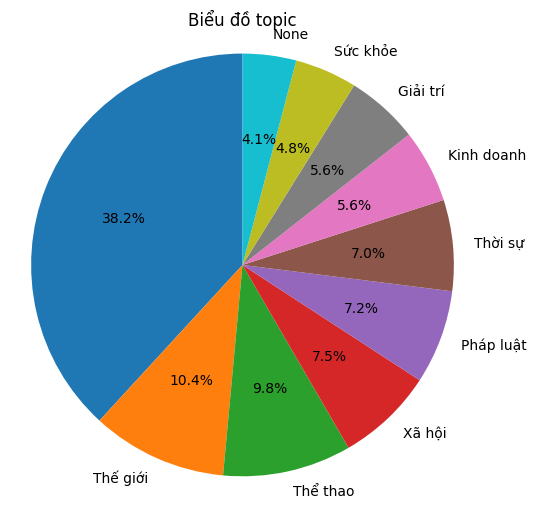

In [52]:
rate_counts = data_mining['topic'].value_counts().nlargest(10)

# Tạo biểu đồ Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(rate_counts, labels=rate_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ topic')
plt.axis('equal')  # Đảm bảo biểu đồ tròn

# Hiển thị biểu đồ
plt.show()

# **Processed Data**

In [ ]:
from pathlib import Path
Path('/kaggle/working/preprocessed_data/').mkdir(parents=True, exist_ok=True)
df.to_csv('/kaggle/working/preprocessed_data/processed_data.csv', index=False)